<a href="https://colab.research.google.com/github/KeisukeShimokawa/papers-challenge/blob/master/src/gan/RealnessGAN/notebooks/RealnessGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`src/gan/RealnessGAN/notebooks/RealnessGAN.ipynb`

In [1]:
!nvidia-smi

Mon May 11 15:17:51 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Kullback-Leibler Divergence

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
!pip freeze | grep torch

torch==1.5.0+cu101
torchsummary==1.5.1
torchtext==0.3.1
torchvision==0.6.0+cu101


In [0]:
p = torch.Tensor([0.1, 0.2, 0.3, 0.4, 0.1])
q = torch.Tensor([0.1, 0.6, 0.2, 0.1, 0.1])

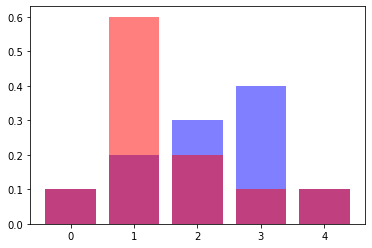

In [6]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(p)), p.numpy(), color="blue", alpha=0.5);
ax.bar(np.arange(len(q)), q.numpy(), color="red", alpha=0.5);

continous variables

$$D_{K L}(p \| q)=\int_{-\infty}^{\infty} p(x) \log \left(\frac{p(x)}{q(x)}\right) d x$$

discrete variables

$$D_{K L}(p \| q)=\sum_{x \in X} p(x) \log \left(\frac{p(x)}{q(x)}\right)$$

### simple mean

In [0]:
def kl_divergence_torch(p, q):
    return (p * (p / q).log()).mean()

In [0]:
def kl_divergence_torch_nn(p, q):
    kl_div = nn.KLDivLoss(size_average=None, reduce=None, reduction="mean")
    return kl_div(q.log(), p)

In [0]:
def kl_divergence_torch_func(p, q):
    return F.kl_div(q.log(), p, size_average=None, reduce=None, reduction="mean")

In [10]:
kl_divergence_torch(p, q)

tensor(0.0913)

In [11]:
kl_divergence_torch_nn(p, q)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2247: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn("reduction: 'mean' divides the total loss by both the batch size and the support size."


tensor(0.0913)

In [12]:
kl_divergence_torch_func(p, q)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2247: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn("reduction: 'mean' divides the total loss by both the batch size and the support size."


tensor(0.0913)

In [13]:
%timeit kl_divergence_torch(p, q)

The slowest run took 23.11 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 13.9 µs per loop


In [14]:
%timeit kl_divergence_torch_nn(p, q)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2247: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn("reduction: 'mean' divides the total loss by both the batch size and the support size."


The slowest run took 49.89 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 47.5 µs per loop


In [15]:
%timeit kl_divergence_torch_func(p, q)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2247: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn("reduction: 'mean' divides the total loss by both the batch size and the support size."


The slowest run took 20.08 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 28 µs per loop


### batchmean

In [0]:
p = torch.Tensor([[0.1, 0.2, 0.3, 0.4, 0.1], 
                  [0.1, 0.2, 0.2, 0.3, 0.2]])
q = torch.Tensor([[0.1, 0.6, 0.2, 0.1, 0.1], 
                  [0.3, 0.1, 0.2, 0.3, 0.1]])

In [17]:
p.sum(dim=-1)

tensor([1.1000, 1.0000])

In [18]:
q.sum(dim=-1)

tensor([1.1000, 1.0000])

In [0]:
def kl_divergence_torch(p, q):
    return (p * (p / q).log()).sum() / p.size(0)

In [0]:
def kl_divergence_torch_nn(p, q):
    kl_div = nn.KLDivLoss(size_average=None, reduce=None, reduction="batchmean")
    return kl_div(q.log(), p)

In [0]:
def kl_divergence_torch_func(p, q):
    return F.kl_div(q.log(), p, size_average=None, reduce=None, reduction="batchmean")

In [22]:
kl_divergence_torch(p, q)

tensor(0.3119)

In [23]:
kl_divergence_torch_nn(p, q)

tensor(0.3119)

In [24]:
kl_divergence_torch_func(p, q)

tensor(0.3119)

## test_z_vec

In [25]:
!wget -q https://www.dropbox.com/s/9nnjsnyekb6glru/z_test_32_128.pickle -O test_z_vec.pickle
!ls

sample_data  test_z_vec.pickle


In [0]:
import pickle

with open("test_z_vec.pickle", "rb") as f:
    test_z_vec = pickle.load(f)

In [27]:
print(test_z_vec.size())
print(test_z_vec.dtype)

torch.Size([32, 128, 1, 1])
torch.float32


## CelebA

In [0]:
!mkdir -p data
!wget -q https://www.dropbox.com/s/j6tp062e14gg5yc/img_align_celeba.zip -O data/celeba.zip
!unzip -q -o -d ./data data/celeba.zip
!rm -rf data/celeba.zip

In [29]:
import glob

print(len(glob.glob("data/img_align_celeba/*")))

202599


## Generator

In [0]:
from torchsummary import summary

In [0]:
class DCGAN_G(nn.Module):
    def __init__(self, im_size, z_dim, g_dim, out_dim):
        super(DCGAN_G, self).__init__()

        mult = im_size // 8

        # start block
        self.start = nn.Sequential(
            nn.ConvTranspose2d(z_dim, g_dim * mult, kernel_size=4, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(g_dim * mult),
            nn.LeakyReLU(0.2, inplace=True)
        )

        # middel block
        middle = []
        while mult > 1:
            middle.append(nn.ConvTranspose2d(g_dim * mult, g_dim * (mult//2), kernel_size=4, stride=2, 
                                             padding=1, bias=False))
            middle.append(nn.BatchNorm2d(g_dim * (mult//2)))
            middle.append(nn.LeakyReLU(0.2, inplace=True))
            mult = mult // 2
        self.middle = nn.Sequential(*middle)

        # end block
        self.end = nn.Sequential(
            nn.ConvTranspose2d(g_dim, out_dim, kernel_size=4, stride=2, padding=1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        out = self.start(input)
        out = self.middle(out)
        out = self.end(out)
        return out

In [32]:
summary(DCGAN_G(128, 128, 128, 3).to(device), (128, 1, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1           [-1, 2048, 4, 4]       4,194,304
       BatchNorm2d-2           [-1, 2048, 4, 4]           4,096
         LeakyReLU-3           [-1, 2048, 4, 4]               0
   ConvTranspose2d-4           [-1, 1024, 8, 8]      33,554,432
       BatchNorm2d-5           [-1, 1024, 8, 8]           2,048
         LeakyReLU-6           [-1, 1024, 8, 8]               0
   ConvTranspose2d-7          [-1, 512, 16, 16]       8,388,608
       BatchNorm2d-8          [-1, 512, 16, 16]           1,024
         LeakyReLU-9          [-1, 512, 16, 16]               0
  ConvTranspose2d-10          [-1, 256, 32, 32]       2,097,152
      BatchNorm2d-11          [-1, 256, 32, 32]             512
        LeakyReLU-12          [-1, 256, 32, 32]               0
  ConvTranspose2d-13          [-1, 128, 64, 64]         524,288
      BatchNorm2d-14          [-1, 128,

## Discriminator

In [0]:
from torch.nn.utils import spectral_norm

In [0]:
class DCGAN_D(nn.Module):
    def __init__(self, im_size, in_dim, d_dim, n_outcomes, use_adaptive_reparam=True):
        super(DCGAN_D, self).__init__()

        self.n_outcomes = n_outcomes
        self.use_adaptive_reparam = use_adaptive_reparam
        image_size_new = im_size // 2

        # start block
        self.start = nn.Sequential(
            spectral_norm(nn.Conv2d(in_dim, d_dim, kernel_size=4, stride=2, padding=1, bias=False)),
            nn.LeakyReLU(0.2, inplace=True)
        )

        # middle block
        mult = 1
        middle = []
        while image_size_new > 4:
            middle.append(spectral_norm(nn.Conv2d(d_dim * mult, d_dim * (2*mult), kernel_size=4, stride=2, padding=1, bias=False)))
            middle.append(nn.LeakyReLU(0.2, inplace=True))
            image_size_new = image_size_new // 2
            mult *= 2

        self.middle = nn.Sequential(*middle)
        self.mult = mult

        # end block
        self.in_size  = int(d_dim * mult * 4 * 4)
        self.out_size = n_outcomes
        self.end = spectral_norm(nn.Linear(self.in_size, self.out_size, bias=False))

        # resampling trick
        self.reparam = spectral_norm(nn.Linear(self.in_size, self.out_size * 2, bias=False))

    def forward(self, input):
        out = self.start(input)
        y = self.middle(out)

        b, c, h, w = y.size()
        y = y.view(b, -1)
        
        output = self.end(y).view(-1, self.n_outcomes)

        # re-parameterization trick
        if self.use_adaptive_reparam:
            # [B, 2*outcomes, 1, 1]
            stat_tuple = self.reparam(y).unsqueeze(2).unsqueeze(3)
            # [B, outcomes, 1, 1], [B, outcomes, 1, 1]
            mu, logvar = stat_tuple.chunk(2, 1)
            std = logvar.mul(0.5).exp_()
            epsilon = torch.randn(input.shape[0], self.n_outcomes, 1, 1).to(stat_tuple)
            output = epsilon.mul(std).add_(mu).view(-1, self.n_outcomes)

        return output

In [35]:
summary(DCGAN_D(128, 3, 128, 20, True).to(device), (3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 64, 64]           6,144
         LeakyReLU-2          [-1, 128, 64, 64]               0
            Conv2d-3          [-1, 256, 32, 32]         524,288
         LeakyReLU-4          [-1, 256, 32, 32]               0
            Conv2d-5          [-1, 512, 16, 16]       2,097,152
         LeakyReLU-6          [-1, 512, 16, 16]               0
            Conv2d-7           [-1, 1024, 8, 8]       8,388,608
         LeakyReLU-8           [-1, 1024, 8, 8]               0
            Conv2d-9           [-1, 2048, 4, 4]      33,554,432
        LeakyReLU-10           [-1, 2048, 4, 4]               0
           Linear-11                   [-1, 20]         655,360
           Linear-12                   [-1, 40]       1,310,720
Total params: 46,536,704
Trainable params: 46,536,704
Non-trainable params: 0
-------------------------

## Trainer: Generator

In [0]:
def learnG_Realness(cfg, D, G, optimizerG, random_sample, 
                    Triplet_Loss, x, anchor1, anchor0):
    is_cuda = cfg.cuda and torch.cuda.is_available()
    device = torch.device("cuda:0" if is_cuda else "cpu")

    z = torch.FloatTensor(cfg.batch_size, cfg.z_size, 1, 1)
    z = z.to(device)

    G.train()
    for p in D.parameters():
        p.requires_grad = False

    for t in range(cfg.g_updates):
        G.zero_grad()
        optimizerG.zero_grad()

        # gradients are accumulated through subiters
        for _ in range(cfg.effective_batch_size // cfg.batch_size):
            images, _ = random_sample.__next__()
            x.copy_(images)
            del images

            num_outcomes = Triplet_Loss.atoms
            anchor_real = torch.zeros((x.shape[0], num_outcomes), dtype=torch.float).to(device) + \
                          torch.tensor(anchor1, dtype=torch.float).to(device)
            anchor_fake = torch.zeros((x.shape[0], num_outcomes), dtype=torch.float).to(device) + \
                          torch.tensor(anchor0, dtype=torch.float).to(device)

            # real images
            feat_real = D(x).log_softmax(1).exp()

            # fake images
            z.normal_(0, 1)
            imgs_fake = G(z)
            feat_fake = D(imgs_fake).log_softmax(1).exp()

            # compute loss
            if cfg.relativisticG:
                lossG = - Triplet_Loss(anchor_fake, feat_fake, skewness=cfg.negative_skew) + \
                          Triplet_Loss(feat_real, feat_fake)
            else:
                lossG = - Triplet_Loss(anchor_fake, feat_fake, skewness=cfg.negative_skew) + \
                          Triplet_Loss(anchor_real, feat_fake, skewness=cfg.positive_skew)
            lossG.backward()

        optimizerG.step()
    
    return lossG

## Trainer: Discriminator

In [0]:
def learnD_Realness(cfg, D, G, optimizerD, random_sample, 
                    Triplet_Loss, x, anchor1, anchor0):
    is_cuda = cfg.cuda and torch.cuda.is_available()
    device = torch.device("cuda:0" if is_cuda else "cpu")

    z = torch.FloatTensor(cfg.batch_size, cfg.z_size, 1, 1)
    z = z.to(device)

    for p in D.parameters():
        p.requires_grad = True

    for t in range(cfg.d_updates):
        D.zero_grad()
        optimizerD.zero_grad()

        # gradients are accumulated through subiters
        for _ in range(cfg.effective_batch_size // cfg.batch_size):
            images, _ = random_sample.__next__()
            num_outcomes = Triplet_Loss.atoms
            x.copy_(images)
            del images

            anchor_real = torch.zeros((x.shape[0], num_outcomes), dtype=torch.float).to(device) + \
                          torch.tensor(anchor1, dtype=torch.float).to(device)
            anchor_fake = torch.zeros((x.shape[0], num_outcomes), dtype=torch.float).to(device) + \
                          torch.tensor(anchor0, dtype=torch.float).to(device)

            # real images
            feat_real = D(x).log_softmax(1).exp()

            # fake images
            z.normal_(0, 1)
            imgs_fake = G(z)
            feat_fake = D(imgs_fake.detach()).log_softmax(1).exp()

            lossD_real = Triplet_Loss(anchor_real, feat_real, skewness=cfg.positive_skew)
            lossD_real.backward()

            lossD_fake = Triplet_Loss(anchor_fake, feat_fake, skewness=cfg.negative_skew)
            lossD_fake.backward()

            lossD = lossD_real + lossD_fake

        optimizerD.step()

    return lossD

## Losses

In [0]:
class CategoricalLoss(nn.Module):
    def __init__(self, atoms=51, v_max=10, v_min=-10):
        super(CategoricalLoss, self).__init__()

        self.atoms = atoms
        self.v_max = v_max
        self.v_min = v_min
        self.supports = torch.linspace(v_min, v_max, atoms).view(1, 1, atoms) # RL: [bs, #action, #quantiles]
        self.delta = (v_max - v_min) / (atoms - 1)

    def to(self, device):
        self.device = device
        self.supports = self.supports.to(device)

    def forward(self, anchor, feature, skewness=0.0):
        batch_size = feature.shape[0]
        skew = torch.zeros((batch_size, self.atoms)).to(self.device).fill_(skewness)

        # experiment to adjust KL divergence between positive/negative anchors
        Tz = skew + self.supports.view(1, -1) * torch.ones((batch_size, 1)).to(torch.float).view(-1, 1).to(self.device)
        Tz = Tz.clamp(self.v_min, self.v_max)
        b = (Tz - self.v_min) / self.delta
        l = b.floor().to(torch.int64)
        u = b.ceil().to(torch.int64)
        l[(u > 0) * (l == u)] -= 1
        u[(l < (self.atoms - 1)) * (l == u)] += 1
        offset = torch.linspace(0, (batch_size - 1) * self.atoms, batch_size).to(torch.int64).unsqueeze(dim=1).expand(batch_size, self.atoms).to(self.device)
        skewed_anchor = torch.zeros(batch_size, self.atoms).to(self.device)
        skewed_anchor.view(-1).index_add_(0, (l + offset).view(-1), (anchor * (u.float() - b)).view(-1))  
        skewed_anchor.view(-1).index_add_(0, (u + offset).view(-1), (anchor * (b - l.float())).view(-1))  

        loss = -(skewed_anchor * (feature + 1e-16).log()).sum(-1).mean()

        return loss

## main

In [0]:
import gc
import os
import sys
import math
import time
import pickle
import random
import datetime
import numpy as np
from scipy.stats import skewnorm

In [0]:
def print_now(cmd, file=None):
    time_now = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    if file is None:
        print('%s %s' % (time_now, cmd))
    else:
        print_str = '%s %s' % (time_now, cmd)
        print(print_str, file=file)
    sys.stdout.flush()

### config

In [0]:
import yaml

In [42]:
%%writefile config.yml

data_path: "data/"
seed: 42
effective_batch_size: 32
batch_size: 32
image_size: 128
n_channels: 3

z_size: 128
g_dim: 128
d_dim: 128
lr_G: 0.0001
lr_D: 0.0001
total_iters: 100000
g_updates: 1
d_updates: 1

adam_eps: 0.000000001
beta1: 0.5
beta2: 0.999
decay: 0
weight_decay: 0

cuda: True
n_gpu: 1
num_workers: 4

gen_extra_images: 50000
gen_every: 100000
print_every: 1000

positive_skew: 1.0
negative_skew: -1.0
num_outcomes: 20
relativisticG: True
use_adaptive_reparam: True

Writing config.yml


In [0]:
class DotDict(dict): 
    def __init__(self, *args, **kwargs): 
        super().__init__(*args, **kwargs) 
        self.__dict__ = self

In [0]:
with open("config.yml", "r") as f:
    cfg = DotDict(yaml.load(f))

In [45]:
cfg

{'adam_eps': 1e-09,
 'batch_size': 32,
 'beta1': 0.5,
 'beta2': 0.999,
 'cuda': True,
 'd_dim': 128,
 'd_updates': 1,
 'data_path': 'data/',
 'decay': 0,
 'effective_batch_size': 32,
 'g_dim': 128,
 'g_updates': 1,
 'gen_every': 100000,
 'gen_extra_images': 50000,
 'image_size': 128,
 'lr_D': 0.0001,
 'lr_G': 0.0001,
 'n_channels': 3,
 'n_gpu': 1,
 'negative_skew': -1.0,
 'num_outcomes': 20,
 'num_workers': 4,
 'positive_skew': 1.0,
 'print_every': 1000,
 'relativisticG': True,
 'seed': 42,
 'total_iters': 100000,
 'use_adaptive_reparam': True,
 'weight_decay': 0,
 'z_size': 128}

In [0]:
def seed_torch(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [0]:
seed_torch(cfg.seed)

In [0]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

In [0]:
trans = transforms.Compose([
    transforms.Resize((cfg.image_size, cfg.image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.5, 0.5, 0.5], std = [0.5, 0.5, 0.5])
])

In [0]:
# celeba
dataset = datasets.ImageFolder(cfg.data_path, transform=trans)

In [0]:
class DataProvider:
    def __init__(self, data):
        self.data_loader = None
        self.iter = None
        self.data = data
        self.data_loader = None

    def build_loader(self, batch_size, num_workers):
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.data_loader = DataLoader(self.data, batch_size=batch_size, shuffle=True, 
                                      drop_last=True, num_workers=num_workers)
        self.iter = iter(self.data_loader)
    
    def __next__(self):
        try:
            return self.iter.next()
        except StopIteration:  # reload when an epoch finishes
            self.build_loader(self.batch_size, self.num_workers)
            return self.iter.next()

In [0]:
random_sample = DataProvider(dataset)
random_sample.build_loader(cfg.batch_size, cfg.num_workers)

In [0]:
G = DCGAN_G(cfg.image_size, cfg.z_size, cfg.g_dim, cfg.n_channels)
D = DCGAN_D(cfg.image_size, cfg.n_channels, cfg.d_dim, cfg.num_outcomes, cfg.use_adaptive_reparam)

In [0]:
Triplet_Loss = CategoricalLoss(atoms=cfg.num_outcomes, 
                               v_max=cfg.positive_skew, 
                               v_min=cfg.negative_skew)

In [0]:
if cfg.n_gpu > 1:
    G = nn.DataParallel(G)
    D = nn.DataParallel(D)

In [0]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [0]:
G.apply(weights_init);
D.apply(weights_init);

In [58]:
test_z_vec.size()

torch.Size([32, 128, 1, 1])

In [0]:

G = G.to(device)
D = D.to(device)
Triplet_Loss.to(device)
test_z_vec = test_z_vec.to(device)
x = torch.FloatTensor(cfg.batch_size, cfg.n_channels, cfg.image_size, cfg.image_size).to(device)

In [0]:
optimizerD = torch.optim.Adam(D.parameters(), lr=cfg.lr_D, betas=(cfg.beta1, cfg.beta2), weight_decay=cfg.weight_decay, eps=cfg.adam_eps)
optimizerG = torch.optim.Adam(G.parameters(), lr=cfg.lr_G, betas=(cfg.beta1, cfg.beta2), weight_decay=cfg.weight_decay)
decayD = torch.optim.lr_scheduler.ExponentialLR(optimizerD, gamma=1-cfg.decay)
decayG = torch.optim.lr_scheduler.ExponentialLR(optimizerG, gamma=1-cfg.decay)

In [0]:
# e.g. normal and uniform
gauss = np.random.normal(0, 0.1, 1000)
count, bins = np.histogram(gauss, cfg.num_outcomes)
anchor0 = count / sum(count)

<BarContainer object of 20 artists>

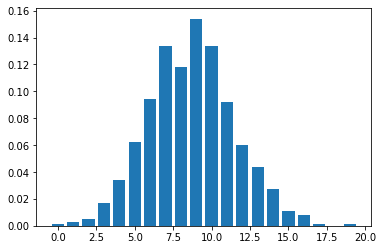

In [62]:
plt.bar(np.arange(len(anchor0)), anchor0)

In [0]:
unif = np.random.uniform(-1, 1, 1000)
count, bins = np.histogram(unif, cfg.num_outcomes)
anchor1 = count / sum(count)

<BarContainer object of 20 artists>

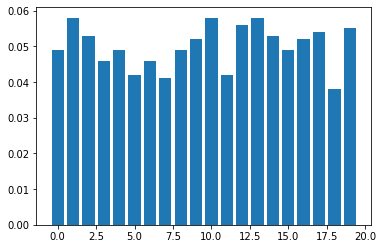

In [64]:
plt.bar(np.arange(len(anchor0)), anchor1)

In [0]:
from torchvision import utils as vutils

In [0]:
from pathlib import Path

image_path = Path("images")

In [0]:
image_path.mkdir(parents=True, exist_ok=True)

In [0]:
start = time.time()
base_dir = "sample"
current_set_images = 0
iter_offset = 0

samples = []
for i in range(iter_offset, cfg.total_iters):
    D.train()
    G.train()

    # save training progress
    if (i+1) % cfg.print_every == 0:
        G.eval()
        with torch.no_grad():
            fake_test = G(test_z_vec)
            vutils.save_image(fake_test.data, f'images/fake_samples_iter{i+1:04}.png', normalize=True)
        G.train()

    lossD = learnD_Realness(cfg, D, G, optimizerD, random_sample, Triplet_Loss, x, anchor1, anchor0)
    lossG = learnG_Realness(cfg, D, G, optimizerG, random_sample, Triplet_Loss, x, anchor1, anchor0)

    decayD.step()
    decayG.step()

    # print progress
    if i < 1000 or (i+1) % 100 == 0:
        end = time.time()
        fmt = '[%d / %d] SD: %d Diff: %.4f loss_D: %.4f loss_G: %.4f time:%.2f'
        s = fmt % (i+1, cfg.total_iters, cfg.seed,
                    -lossD.data.item() + lossG.data.item() if (lossD is not None) and (lossG is not None) else -1.0,
                    lossD.data.item()                      if lossD is not None else -1.0,
                    lossG.data.item()                      if lossG is not None else -1.0,
                    end - start)

    # generate extra images
    if (i+1) % cfg.gen_every == 0:
        current_set_images += 1
        # if not os.path.exists('%s/models/' % (param.extra_folder)):
        #     os.mkdir('%s/models/' % (param.extra_folder))
        # torch.save({
        #     'i': i + 1,
        #     'current_set_images': current_set_images,
        #     'G_state': G.state_dict(),
        #     'D_state': D.state_dict(),
        #     'G_optimizer': optimizerG.state_dict(),
        #     'D_optimizer': optimizerD.state_dict(),
        #     'G_scheduler': decayG.state_dict(),
        #     'D_scheduler': decayD.state_dict(),
        #     'z_test': z_test,
        # }, '%s/models/state_%02d.pth' % (param.extra_folder, current_set_images))
        # print_now('Model saved.')

        # if os.path.exists('%s/%01d/' % (param.extra_folder, current_set_images)):
        #     for root, dirs, files in os.walk('%s/%01d/' % (param.extra_folder, current_set_images)):
        #         for f in files:
        #             os.unlink(os.path.join(root, f))
        # else:
        #     os.mkdir('%s/%01d/' % (param.extra_folder, current_set_images))

        # G.eval()
        # extra_batch = 100 if cfg.image_size <= 256 else cfg.batch_size
        # with torch.no_grad():param
        #     ext_curr = 0
        #     z_extra = torch.FloatTensor(extra_batch, cfg.z_size, 1, 1)
        #     z_extra = z_extra.to(device)
        #     for ext in range(int(cfg.gen_extra_images/extra_batch)):
        #         fake_test = G(z_extra.normal_(0, 1)) 
                    
        #         for ext_i in range(fake_test.size(0)):start = time.time()
        #             vutils.save_image((fake_test[ext_i]*.50)+.50, '%s/%01d/fake_samples_%05d.png' % (param.extra_folder, current_set_images, ext_curr),
        #                 normalize=False, padding=0)
        #             ext_curr += 1
        #     del z_extra
        #     del fake_test
        G.train()
        # print_now('Finished generating extra samples at iteration %d'%((i+1)))